In [2]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

Installing. Please wait... done!


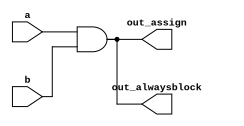

In [ ]:
#Alwaysblock1
%%print_verilog
module top_module(
    input a,
    input b,
    output wire out_assign,
    output reg out_alwaysblock
);
    assign out_assign = a & b;
    always @(*) out_alwaysblock = a & b;

endmodule

In [ ]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg a_tb, b_tb;  wire out_assign_tb, out_always_tb;

  top_module top(.a(a_tb), .b(b_tb), .out_assign(out_assign_tb), .out_alwaysblock(out_always_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 a_tb = 0; b_tb = 1;
    # 1 a_tb = 1; b_tb = 1;
    # 1 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module(
    input a,
    input b,
    output wire out_assign,
    output reg out_alwaysblock
);
    assign out_assign = a & b;
    always @(*) out_alwaysblock = a & b;

endmodule
//////////////////////////////////////////////////////////


VCD info: dumpfile tb.vcd opened for output.



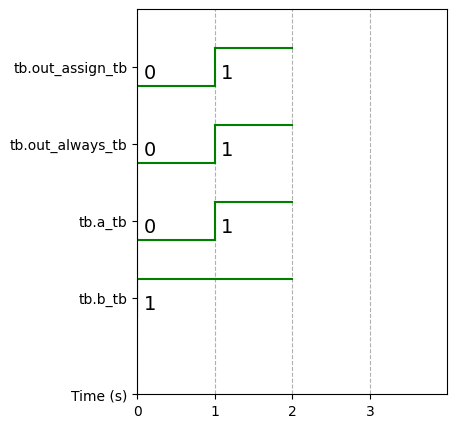

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.out_assign_tb','tb.out_always_tb', 'tb.a_tb', 'tb.b_tb']
time_begin = 0
time_end = 3
base = 'dec' # bin, dec, dec2, hex, octal

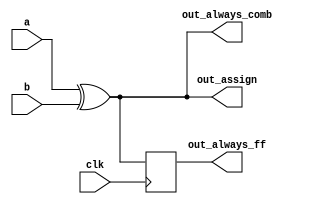

In [ ]:
#Alwaysblock2
%%print_verilog
module top_module(
    input clk,
    input a,
    input b,
    output wire out_assign,
    output reg out_always_comb,
    output reg out_always_ff   );

    assign out_assign =  a^b;
    always @(*) out_always_comb = a ^ b;
    always @(posedge clk) out_always_ff <= a ^ b;

endmodule

In [ ]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg clk_tb, a_tb, b_tb;  wire out_assign_tb, out_always_comb_tb, out_always_ff_tb;

  top_module top(.clk(clk_tb), .a(a_tb), .b(b_tb), .out_assign(out_assign_tb), .out_always_comb(out_always_comb_tb), .out_always_ff(out_always_ff_tb));

  parameter CYCLE = 10;


  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 a_tb = 0; b_tb = 1;
    # 1 a_tb = 1; b_tb = 1;
    # 5 a_tb = 1; b_tb = 0;
    # 10 $finish;
  end

  always begin
    #(CYCLE/10);
    clk_tb = 1;
    #(CYCLE/10);
    clk_tb = 0;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module(
    input clk,
    input a,
    input b,
    output wire out_assign,
    output reg out_always_comb,
    output reg out_always_ff   );

    assign out_assign =  a^b;
    always @(*) out_always_comb = a ^ b;
    always @(posedge clk) out_always_ff <= a ^ b;

endmodule
//////////////////////////////////////////////////////////


VCD info: dumpfile tb.vcd opened for output.



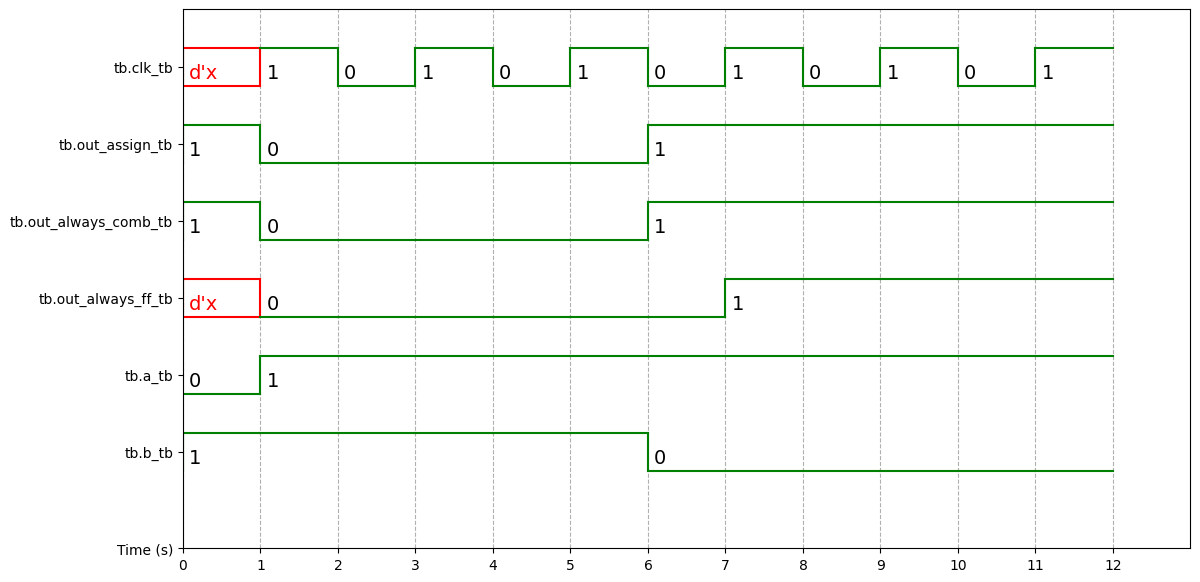

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.clk_tb', 'tb.out_assign_tb','tb.out_always_comb_tb', 'tb.out_always_ff_tb', 'tb.a_tb', 'tb.b_tb']
time_begin = 0
time_end = 12
base = 'dec' # bin, dec, dec2, hex, octal

Installing. Please wait... done!


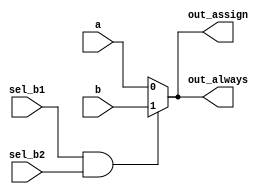

In [3]:
#always-if
%%print_verilog
// synthesis verilog_input_version verilog_2001
module top_module(
    input a,
    input b,
    input sel_b1,
    input sel_b2,
    output wire out_assign,
    output reg out_always   );

    assign out_assign = sel_b1&sel_b2 ? b : a;
    always @(*) begin
        if(sel_b1&sel_b2) begin
            out_always = b;
        end
        else begin
            out_always = a;
        end
    end

endmodule


In [6]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg a_tb, b_tb, sel_b1_tb, sel_b2_tb;  wire out_assign_tb, out_always_tb;

  top_module top(.a(a_tb), .b(b_tb), .sel_b1(sel_b1_tb), .sel_b2(sel_b2_tb) ,.out_assign(out_assign_tb), .out_always(out_always_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 a_tb = 0; b_tb = 1; sel_b1_tb = 1; sel_b2_tb = 1;
    # 4 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module(
    input a,
    input b,
    input sel_b1,
    input sel_b2,
    output wire out_assign,
    output reg out_always   );

    assign out_assign = sel_b1&sel_b2 ? b : a;
    always @(*) begin
        if(sel_b1&sel_b2) begin
            out_always = b;
        end
        else begin
            out_always = a;
        end
    end

endmodule

//////////////////////////////////////////////////////////


VCD info: dumpfile tb.vcd opened for output.



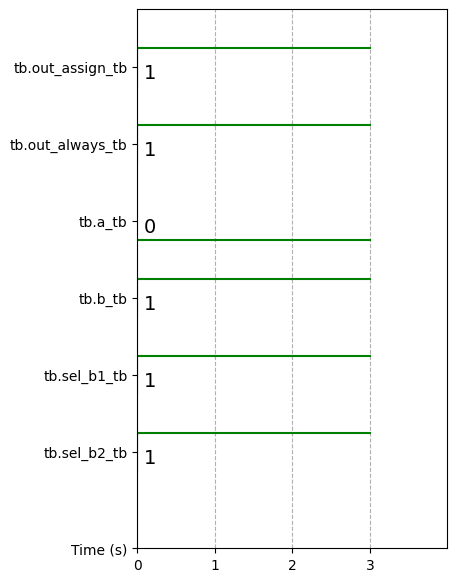

In [7]:
%%waveform tb.vcd
sign_list = ['tb.out_assign_tb','tb.out_always_tb', 'tb.a_tb', 'tb.b_tb', 'tb.sel_b1_tb', 'tb.sel_b2_tb']
time_begin = 0
time_end = 3
base = 'dec' # bin, dec, dec2, hex, octal

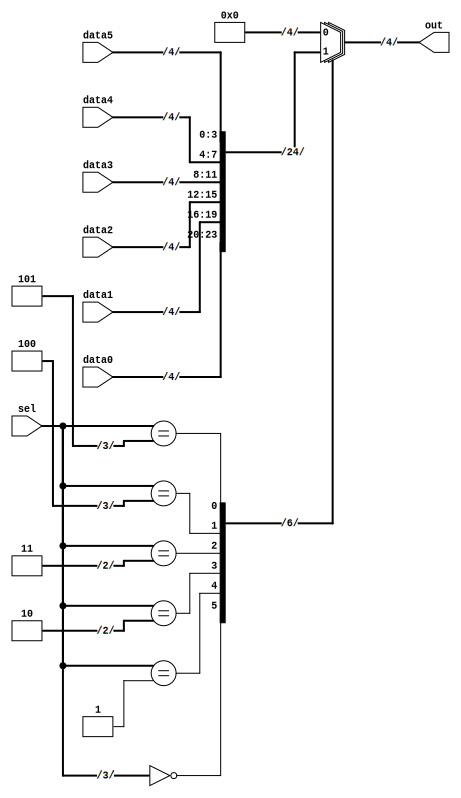

In [8]:
# case statement
%%print_verilog
module top_module (
    input [2:0] sel,
    input [3:0] data0,
    input [3:0] data1,
    input [3:0] data2,
    input [3:0] data3,
    input [3:0] data4,
    input [3:0] data5,
    output reg [3:0] out   );//

    always@(*) begin  // This is a combinational circuit
        case(sel)
            3'b000 : out = data0;
            3'b001 : out = data1;
            3'b010 : out = data2;
            3'b011 : out = data3;
            3'b100 : out = data4;
            3'b101 : out = data5;
            default : out = 0;
        endcase
    end

endmodule

In [15]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg[3:0] d0_tb, d1_tb, d2_tb, d3_tb, d4_tb, d5_tb; reg[2:0] sel_tb;  wire[3:0] out_tb;

  top_module top(.data0(d0_tb), .data1(d1_tb), .data2(d2_tb), .data3(d3_tb), .data4(d4_tb), .data5(d5_tb), .sel(sel_tb), .out(out_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 0;
    # 1 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 1;
    # 1 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 2;
    # 1 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 3;
    # 1 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 4;
    # 1 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 5;
    # 1 d0_tb = 0; d1_tb = 1; d2_tb = 2; d3_tb = 3; d4_tb = 4; d5_tb = 5; sel_tb = 7;
    # 10 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module (
    input [2:0] sel,
    input [3:0] data0,
    input [3:0] data1,
    input [3:0] data2,
    input [3:0] data3,
    input [3:0] data4,
    input [3:0] data5,
    output reg [3:0] out   );//

    always@(*) begin  // This is a combinational circuit
        case(sel)
            3'b000 : out = data0;
            3'b001 : out = data1;
            3'b010 : out = data2;
            3'b011 : out = data3;
            3'b100 : out = data4;
            3'b101 : out = data5;
            default : out = 0;
        endcase
    end

endmodule

//////////////////////////////////////////////////////////


VCD info: dumpfile tb.vcd opened for output.



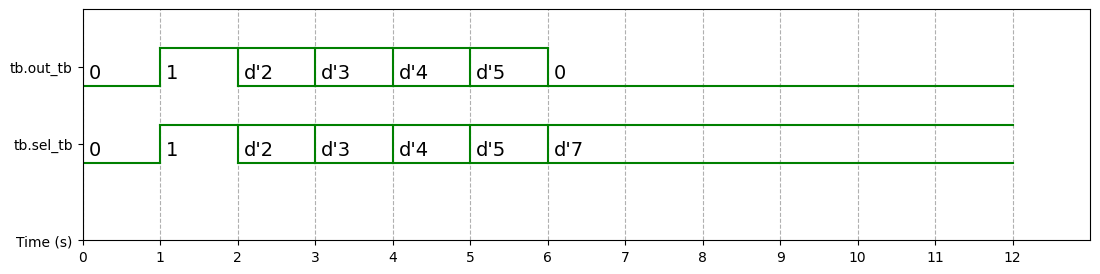

In [16]:
%%waveform tb.vcd
sign_list = ['tb.out_tb', 'tb.sel_tb']
time_begin = 0
time_end = 12
base = 'dec' # bin, dec, dec2, hex, octal